Resonance Field Fit: F = 0.4888, G = 8.3071, φ = -2.43°


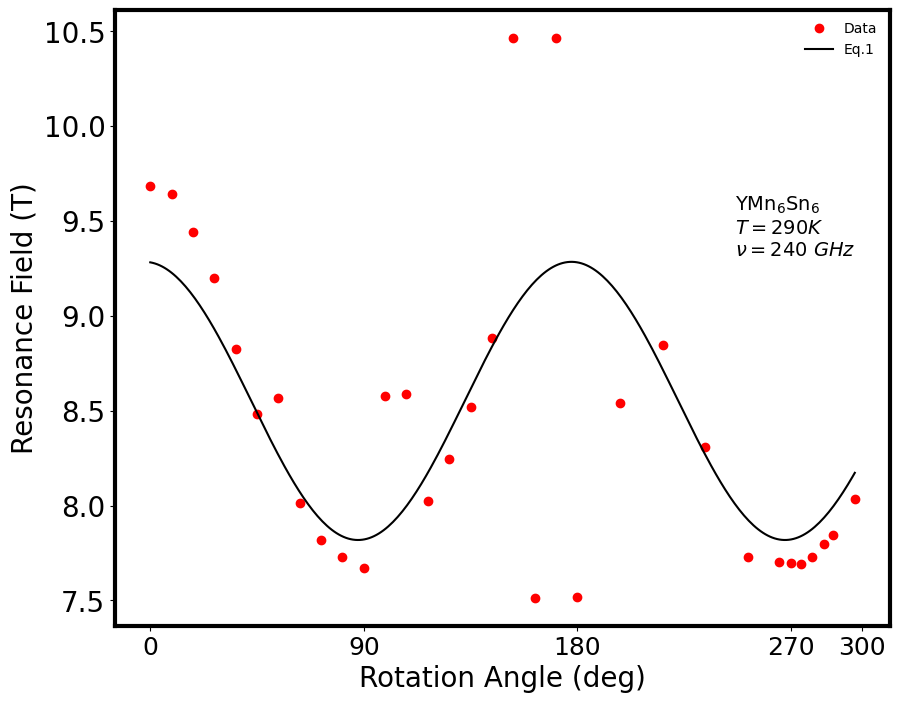

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given Data
resonance_fields = np.array([9.682, 9.642, 9.444, 9.202, 8.824, 8.484, 8.569, 8.012, 
                             7.820, 7.727, 7.671, 8.575, 8.588, 8.022, 8.244, 8.517, 
                             8.885, 10.466, 7.514, 10.466, 7.518, 8.538, 8.846, 8.308, 
                             7.727, 7.702, 7.696, 7.692, 7.729, 7.796, 7.846, 8.036])

#g_values = np.array([1.761, 1.773, 1.811, 1.857, 1.938, 1.994, 2.028, 2.134, 2.077, 
                    # 2.210, 2.224, 1.995, 1.994, 2.133, 2.065, 2.008, 1.967, 1.863, 
                     #2.006, 1.638, 2.280, 2.008, 1.989, 2.038, 2.210, 2.218, 2.219, 
                     #2.218, 2.211, 2.194, 2.180, 2.127])

angles_deg = np.array([0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99, 108, 117, 126, 
                       135, 144, 153, 162, 171, 180, 198, 216, 234, 252, 265, 270, 
                       274.5, 279, 284, 288, 297])

# Convert angles to radians
angles_rad = np.radians(angles_deg)

# Define fitting function
def resonance_eq(theta, F, G, phi):
    return F * (3 * np.cos(theta - phi)**2 - 1) + G

# Initial parameter guess [F, G, phi]
initial_guess = [1.0, np.mean(resonance_fields), 0]

# Fit the resonance field data
params_res, _ = curve_fit(resonance_eq, angles_rad, resonance_fields, p0=initial_guess)

# Fit the g-value data
#params_g, _ = curve_fit(resonance_eq, angles_rad, g_values, p0=initial_guess)

# Generate smooth curve for fitted function
theta_fit = np.linspace(0, max(angles_rad), 300)
res_fit = resonance_eq(theta_fit, *params_res)
#g_fit = resonance_eq(theta_fit, *params_g)

# Extract fitted parameters
F_res, G_res, phi_res = params_res
#F_g, G_g, phi_g = params_g

# Print fitted parameters
print(f"Resonance Field Fit: F = {F_res:.4f}, G = {G_res:.4f}, φ = {np.degrees(phi_res):.2f}°")
#print(f"g-Value Fit: F = {F_g:.4f}, G = {G_g:.4f}, φ = {np.degrees(phi_g):.2f}°")

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot resonance field data and fit
ax.set_xlabel('Rotation Angle (deg)', fontsize=20)
ax.set_ylabel('Resonance Field (T)', fontsize=20, color='black')
ax.plot(angles_rad, resonance_fields, 'ro', label="Data", linewidth=7)  # Red circles
ax.plot(theta_fit, res_fit, 'k-', label="Eq.1")  # Black fit line
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Add second y-axis for g-value
#ax2 = ax1.twinx()
#ax2.set_ylabel('g-value', fontsize=18, color='navy')
#ax2.plot(angles_rad, g_values, 'v', color='navy', markerfacecolor='none', linewidth=5)  # Navy blue triangles
#ax2.plot(theta_fit, g_fit, '--', color='navy')  # Navy blue fit line
#ax2.tick_params(axis='y', labelcolor='navy', labelsize=18)

# Custom X-axis labels
angle_labels = ['0', '90', '180', '270', '300']
angle_positions = [0, np.pi/2, np.pi, 3*np.pi/2, 5*np.pi/3]
ax.set_xticks(angle_positions)
ax.set_xticklabels(angle_labels, fontsize=18)

# Legends
compound_legend = r'YMn$_6$Sn$_6$' '\n' r'$T = 290K$' '\n' r'$\nu=240\ GHz$'
ax.legend(frameon=False, loc='upper right')
#ax2.legend(frameon=False, loc='lower right')

# Add compound legend separately
ax.text(0.8, 0.7, compound_legend, transform=ax.transAxes, fontsize=14, verticalalignment='top', horizontalalignment='left', color='black')

# Increase axis line thickness
ax.spines['bottom'].set_linewidth(3)  # X-axis
ax.spines['left'].set_linewidth(3)    # Y-axis
ax.spines['top'].set_linewidth(3)     # Top border (optional)
ax.spines['right'].set_linewidth(3)   # Right border (optional)

#plt.title('Resonance Field and g-Value Fit', fontsize=14)
#plt.savefig("resonance_fit 2.jpg ", dpi=300, bbox_inches='tight')
plt.show()